In [2]:
%run "..\\..\\config\\AppSettings.py"

import pandas as pd
#from app.config.AppSettings import AppSettings
import matplotlib.pyplot as plt
import seaborn as sb
import squarify as sq

In [3]:
settings = AppSettings()

url_list = []
url_list.append(settings._common_account)
url_list.append(settings._repo_name)
url_list.append(settings._branch_name)
url_list.append(settings._app_root)
url_list.append(settings._data_analysis_folder)
url_list.append(settings._cleaned_files_path)
url_list.append(settings._cleaned_csv_path)

csv_url = settings._raw_data_url + "/".join(url_list)

#Reading Cleaned CSV
df = pd.read_csv(csv_url, sep=",", header=0, skipinitialspace=True)

In [4]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Car_Age,Brand,Model
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998.0,58.16,5.0,0,1.75,14,Maruti,Wagon
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582.0,126.20,5.0,0,12.50,9,Hyundai,Creta
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199.0,88.70,5.0,8.61 Lakh,4.50,13,Honda,Jazz
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248.0,88.76,7.0,0,6.00,12,Maruti,Ertiga
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968.0,140.80,5.0,0,17.74,11,Audi,A4


In [6]:
#Heatmap of Years and Kms driven
df_cols = df[["Year", "Kilometers_Driven"]]
df_cols.head()


,Year,Kilometers_Driven
0,2010,72000
1,2015,41000
2,2011,46000
3,2012,87000
4,2013,40670


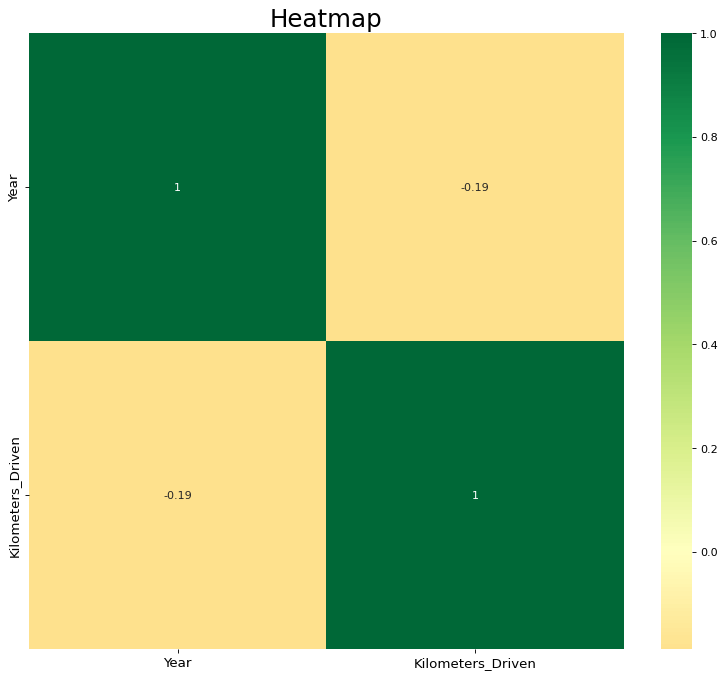

In [7]:
plt.figure(figsize=(12,10), dpi= 80)
sb.heatmap(df_cols.corr(), xticklabels=df_cols.corr().columns, 
            yticklabels=df_cols.corr().columns, cmap='RdYlGn', center=0, annot=True)
plt.title('Heatmap', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

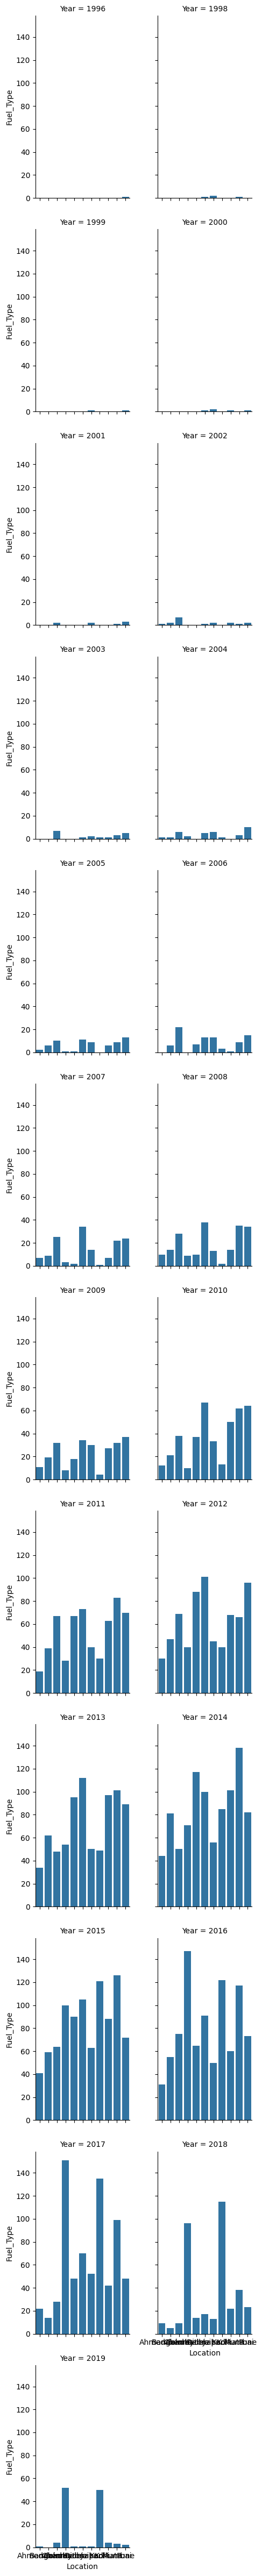

In [8]:
#Categorical plots by Location, Year and Fuel Type
grouped_data = df.groupby(["Location", "Year"])["Fuel_Type"].count()
grouped_data.head(500)
df_grouped = grouped_data.to_frame()
sb.catplot(
    data=df_grouped, x="Location", y="Fuel_Type", col="Year", col_wrap=2,
    kind="bar", height=4, aspect=.6
)
plt.show()

In [10]:
#Treemap of Years and Kilometers Driven
series = df.groupby(["Year"])["Kilometers_Driven"].sum()
series.head(100)


Year
1996       65000
1998      349600
1999      210000
2000      525000
2001     1117943
2002     1449924
2003     1644902
2004     3465250
2005     6274453
2006     8800050
2007    12728699
2008    17483707
2009    20179357
2010    29591598
2011    39943123
2012    48183241
2013    50937556
2014    52875520
2015    49598124
2016    39073110
2017    30335814
2018     8617873
2019     2294461
Name: Kilometers_Driven, dtype: int64

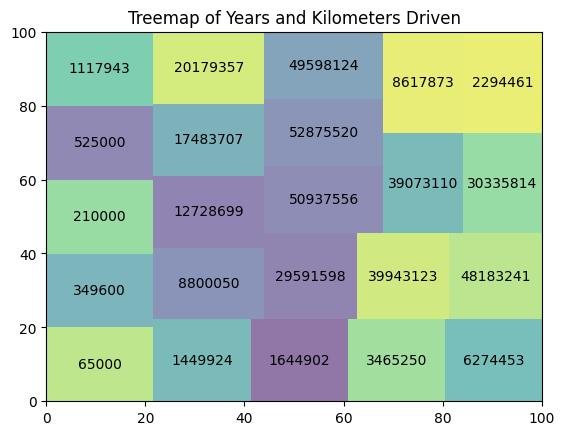

In [11]:
df_transformed = series.to_frame().reset_index()
df_transformed = df_transformed.rename(columns= {1: 'Total Kilometers'})
df_transformed.head(100)
sizes = df_transformed["Year"] # Proportions of the categories
label = df_transformed["Kilometers_Driven"]
sq.plot(sizes=sizes, label=label, alpha=0.6).set(title='Treemap of Years and Kilometers Driven')
plt.show()
